In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
data_dir = '/content/drive/My Drive/ - Project/CompletedDatasets(1995-2015)'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df = pd.read_csv("{}/Combined Data Sets - unsplit.csv".format(data_dir))
df.columns = ['Date','Imports','Exports',
                     'Inflation','Interest_rate','unemployment_rate', 'consumer_spend','gov_spend']
df.head()

df1 = pd.read_csv("{}/Combined Data Sets - Sheet1.csv".format(data_dir))
df1.columns = ['Date','Imports','Exports',
                     'Inflation','Interest_rate','unemployment_rate','gov_spend','CS_household','CS_Abroad','Last_Interest']
print(df1.head())
df1.dtypes

df2=df1.copy()
df2=df2.drop(columns=['Last_Interest'])
#df2.head()


       Date      Imports      Exports  ...  CS_household  CS_Abroad  Last_Interest
0  1/1/1995  17924621559  18840767477  ...   35285333333  725666667           7.25
1  2/1/1995  18850631132  18961355733  ...   38380333333  168666667           7.25
2  3/1/1995  21459631583  21998593463  ...   38380333333  168666667           8.13
3  4/1/1995  19209464793  20458908784  ...   38380333333  168666667           8.06
4  5/1/1995  20506072605  22890415543  ...   38088000000 -582333333           7.97

[5 rows x 10 columns]


,Date,Imports,Exports,Inflation,Interest_rate,unemployment_rate,gov_spend,CS_household,CS_Abroad
0,1/1/1995,17924621559,18840767477,1.50,7.25,9.633,45302000000,35285333333,725666667
1,2/1/1995,18850631132,18961355733,1.90,8.13,9.589,45273333333,38380333333,168666667
2,3/1/1995,21459631583,21998593463,2.30,8.06,9.544,45244666667,38380333333,168666667
3,4/1/1995,19209464793,20458908784,2.70,7.97,9.500,45216000000,38380333333,168666667
4,5/1/1995,20506072605,22890415543,2.57,7.59,9.478,45090000000,38088000000,-582333333


In [ ]:
df.isna().sum() # no data missing




Date                 0
Imports              0
Exports              0
Inflation            0
Interest_rate        0
unemployment_rate    0
consumer_spend       0
gov_spend            0
dtype: int64

In [ ]:
df1.isna().sum()

Date                 0
Imports              0
Exports              0
Inflation            0
Interest_rate        0
unemployment_rate    0
gov_spend            0
CS_household         0
CS_Abroad            0
Last_Interest        0
dtype: int64

In [ ]:
df = df.set_index("Date")

df.index = pd.to_datetime(df.index)


df.head()



df1=df1.set_index("Date")

df1.index = pd.to_datetime(df1.index)



df2=df2.set_index("Date")

df2.index = pd.to_datetime(df2.index)


In [ ]:
df.corr() # correlation for UNSPLIT baseline

,Imports,Exports,Inflation,Interest_rate,unemployment_rate,consumer_spend,gov_spend
Imports,1.000000,0.936835,-0.067758,-0.655374,-0.646182,0.881872,0.865689
Exports,0.936835,1.000000,0.076814,-0.526838,-0.768182,0.779950,0.756423
Inflation,-0.067758,0.076814,1.000000,0.288871,-0.258003,-0.176632,-0.186517
Interest_rate,-0.655374,-0.526838,0.288871,1.000000,0.186175,-0.798649,-0.811847
unemployment_rate,-0.646182,-0.768182,-0.258003,0.186175,1.000000,-0.536021,-0.480249
consumer_spend,0.881872,0.779950,-0.176632,-0.798649,-0.536021,1.000000,0.989861
gov_spend,0.865689,0.756423,-0.186517,-0.811847,-0.480249,0.989861,1.000000


In [ ]:
def print_heavily_correlated_features(df, threshold=0.7):   #checking for correlation >0.7
  corr = df.corr().abs()
  corr = corr[corr > threshold]
  print(corr.count().sort_values(ascending=False) - 1)

print_heavily_correlated_features(df, 0.7)

gov_spend            4
consumer_spend       4
Exports              4
Imports              3
Interest_rate        2
unemployment_rate    1
Inflation            0
dtype: int64


In [ ]:
#splitting consumer spending to see if corr has changed
df2.corr()


print_heavily_correlated_features(df2, 0.7)

gov_spend            5
CS_household         4
Exports              4
Imports              3
Interest_rate        2
CS_Abroad            1
unemployment_rate    1
Inflation            0
dtype: int64


In [ ]:

df_reduced = df2.copy()  #drop top 3

# Write your code here.
# -------------------


df_train = df_reduced['1995-01-01':'2007-12-01']
df_test = df_reduced['2008-01-01':]


# Partition the training data into features and target
X_train = df_train.drop(columns=['Interest_rate','gov_spend','CS_household','Exports'])
y_train = df_train.Interest_rate

# Fit the model
linreg_reduced = LinearRegression()
linreg_reduced.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['Interest_rate','gov_spend','CS_household','Exports'])
y_test = df_test.Interest_rate

# Predict the number of wins
print(linreg_reduced.predict(X_test))

#test Scores:
train_score = linreg_reduced.score(X_train, y_train)
test_score = linreg_reduced.score(X_test, y_test)


betas = pd.Series(linreg_reduced.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg_reduced.intercept_}))
print(betas)
print('\nThe train score is {} and the test score is {}'.format(train_score, test_score))

[3.14696353 2.99202613 2.24256713 2.92626769 2.69019672 2.984381
 3.89813017 3.30839913 3.50729769 2.43951989 2.53443921 3.11113159
 3.4078823  3.1352173  2.37513401 2.81898488 2.52684626 2.68683334
 3.36839019 3.06379269 3.41033112 2.69304556 2.93922002 3.6081647
 2.87420256 2.68345937 1.9810652  2.60909579 2.37187206 2.61777107
 3.43731652 3.03885083 3.38363211 2.55283071 2.79468633 3.48156954
 2.60949441 2.44077539 1.70058945 2.43562101 2.1492664  2.40852642
 3.30511607 2.79341036 3.07861832 2.06328044 2.31214182 3.04843586
 2.44975771 2.18326987 1.34345848 2.02690645 1.71579265 1.96894087
 2.8813527  2.37915941 2.69521142 1.66303067 1.94396275 2.72096961
 2.14808885 1.8941582  1.05216536 1.77799212 1.50087493 1.79497092
 2.76489546 2.24415522 2.57271388 1.51343103 1.82180793 2.64642272
 1.80697964 1.58708197 0.71598185 1.53602706 1.20609365 1.49665799
 2.51507351 1.9752845  2.36184418 1.25544917 1.51881131 2.32615152
 1.52883815 1.26734434 0.30874988 1.11892709 0.76819682 1.0775660

In [ ]:
df_reduced1 = df2.copy()  #TRY LASSO MODEL  - didnt help score, linear regression NOT GOOD on baseline

df_train = df_reduced1['1995-01-01':'2007-12-01']
df_test = df_reduced1['2008-01-01':]


# Partition the training data into features and target
X_train = df_train.drop(columns=['Interest_rate','gov_spend','CS_household','Exports'])
y_train = df_train.Interest_rate

# Fit the model
lasso = LassoCV()
lasso.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['Interest_rate','gov_spend','CS_household','Exports'])
y_test = df_test.Interest_rate

# calculate the score
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))

# calculate betas
betas = pd.Series(lasso.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": lasso.intercept_}))
print(betas)

The train score is 0.13328415481339173 and the test score is -6.786618962525626
Imports             -8.965831e-11
Inflation            0.000000e+00
unemployment_rate   -0.000000e+00
CS_Abroad           -0.000000e+00
Intercept            6.495144e+00
dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
df_reduced = df1.copy()  #TRY REcursive DATA WITH LIN REG - much better score 

# Write your code here.
# -------------------


df_train = df_reduced['1995-01-01':'2007-12-01']
df_test = df_reduced['2008-01-01':]


# Partition the training data into features and target
X_train = df_train.drop(columns=['Interest_rate','gov_spend','CS_household','Exports'])
y_train = df_train.Interest_rate

# Fit the model
linreg_reduced = LinearRegression()
linreg_reduced.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['Interest_rate','gov_spend','CS_household','Exports'])
y_test = df_test.Interest_rate

# Predict the number of wins
print(linreg_reduced.predict(X_test))

#test Scores:
train_score = linreg_reduced.score(X_train, y_train)
test_score = linreg_reduced.score(X_test, y_test)


betas = pd.Series(linreg_reduced.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg_reduced.intercept_}))
print(betas)
print('\nThe train score is {} and the test score is {}'.format(train_score, test_score))

[4.28045642 4.03212964 4.00996355 3.53447494 3.0351436  3.03364392
 3.04726467 3.03245689 3.03909499 3.01466273 2.2647613  2.26403985
 1.52394345 1.02762368 1.00493098 0.52366209 0.2807082  0.29034045
 0.31263017 0.29448725 0.29407591 0.26719784 0.26682956 0.28187923
 0.2621521  0.26443349 0.25202241 0.27260161 0.26665189 0.26832073
 0.52859882 0.76402254 0.77625261 1.00348571 1.00251652 1.01694194
 0.99294235 0.98830558 0.96752839 0.98296166 0.98559615 0.99794918
 1.02581292 1.01237798 1.02061066 0.99658954 0.99891566 1.01768127
 1.00378838 1.00695924 0.99402875 1.01888909 1.01843027 1.02796711
 1.05355528 1.04104612 1.05002485 1.02597063 1.03047408 1.0519889
 1.04003374 1.03847526 1.02048142 1.04132912 1.03609341 1.04004497
 1.0608524  1.04810413 1.05791472 1.03371608 1.03406868 1.05227094
 1.02925959 1.02088598 0.99426408 1.0091272  1.00723171 1.01558222
 1.04207084 1.03106869 1.04535647 1.0228461  1.03045159 1.05656332
 1.04292562 1.03800689 0.76858443 0.78698281 0.7793974  0.78373

In [ ]:
df1_N = df1.copy()  #STANDADIZING IMPORTS AND CS_ABROAD COLUMNS


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df1_N[['Imports','CS_Abroad']]=scaler.fit_transform(df1_N[['Imports','CS_Abroad']].values)
df1_N.head()

,Imports,Exports,Inflation,Interest_rate,unemployment_rate,gov_spend,CS_household,CS_Abroad,Last_Interest
Date,,,,,,,,,
1995-01-01,-1.857937,18840767477,1.50,7.25,9.633,45302000000,35285333333,0.131173,7.25
1995-02-01,-1.730230,18961355733,1.90,8.13,9.589,45273333333,38380333333,-0.525404,7.25
1995-03-01,-1.370422,21998593463,2.30,8.06,9.544,45244666667,38380333333,-0.525404,8.13
1995-04-01,-1.680743,20458908784,2.70,7.97,9.500,45216000000,38380333333,-0.525404,8.06
1995-05-01,-1.501928,22890415543,2.57,7.59,9.478,45090000000,38088000000,-1.410664,7.97


In [ ]:
#RUNNING REG ON THAT - no difference(TA plz?)

df_reduced = df1_N.copy()  #TRY REcursive DATA WITH LIN REG - much better score 

# Write your code here.
# -------------------


df_train = df_reduced['1995-01-01':'2007-12-01']
df_test = df_reduced['2008-01-01':]


# Partition the training data into features and target
X_train = df_train.drop(columns=['Interest_rate','gov_spend','CS_household','Exports'])
y_train = df_train.Interest_rate

# Fit the model
linreg_reduced = LinearRegression()
linreg_reduced.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['Interest_rate','gov_spend','CS_household','Exports'])
y_test = df_test.Interest_rate

# Predict the number of wins
print(linreg_reduced.predict(X_test))

#test Scores:
train_score = linreg_reduced.score(X_train, y_train)
test_score = linreg_reduced.score(X_test, y_test)


betas = pd.Series(linreg_reduced.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg_reduced.intercept_}))
print(betas)
print('\nThe train score is {} and the test score is {}'.format(train_score, test_score))

[4.28045642 4.03212964 4.00996355 3.53447495 3.0351436  3.03364392
 3.04726467 3.03245689 3.03909499 3.01466273 2.2647613  2.26403986
 1.52394345 1.02762368 1.00493099 0.52366209 0.2807082  0.29034045
 0.31263018 0.29448725 0.29407591 0.26719784 0.26682957 0.28187924
 0.26215211 0.26443349 0.25202242 0.27260161 0.26665189 0.26832073
 0.52859882 0.76402254 0.77625261 1.00348571 1.00251653 1.01694195
 0.99294235 0.98830558 0.96752839 0.98296166 0.98559615 0.99794918
 1.02581292 1.01237798 1.02061067 0.99658954 0.99891566 1.01768128
 1.00378839 1.00695924 0.99402875 1.01888909 1.01843027 1.02796711
 1.05355528 1.04104612 1.05002485 1.02597063 1.03047409 1.05198891
 1.04003375 1.03847527 1.02048142 1.04132912 1.03609341 1.04004497
 1.0608524  1.04810413 1.05791472 1.03371608 1.03406869 1.05227095
 1.02925959 1.02088598 0.99426408 1.00912721 1.00723171 1.01558222
 1.04207085 1.03106869 1.04535648 1.0228461  1.0304516  1.05656332
 1.04292562 1.03800689 0.76858443 0.78698281 0.7793974  0.7837

In [ ]:
#USING Crossvalidation to see how many estimataors we need for RF(RUNNING THIS WILL TAKE A WHILE)



# We have made a copy of the data frame
df_reduced = df1.copy()

# Write your code here.
# -------------------


df_train = df_reduced['1995-01-01':'2007-12-01']
df_test = df_reduced['2008-01-01':]


# Partition the training data into features and target
X_train = df_train.drop(columns=['Interest_rate','gov_spend','CS_household','Exports'])
y_train = df_train.Interest_rate



# Partition the testing data into features and target
X_test = df_test.drop(columns=['Interest_rate','gov_spend','CS_household','Exports'])
y_test = df_test.Interest_rate

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

# Initailize cross validation score DataFrame
depth_lb = 1
depth_ub = 200
cv_scores = pd.Series(index=np.arange(depth_lb, depth_ub))

for max_depth in range(depth_lb, depth_ub):
  
  # Initialize the model
  rf_cv1_model = RandomForestRegressor(n_estimators=max_depth, random_state=0)

  # Run cross validation to get measure of out-of-sample error
  example_cv_results = cross_validate(rf_cv1_model, X_train, y_train, cv=5)
  
  # Record the average out-of-sample error
  cv_scores.loc[max_depth] = example_cv_results['test_score'].mean()

9

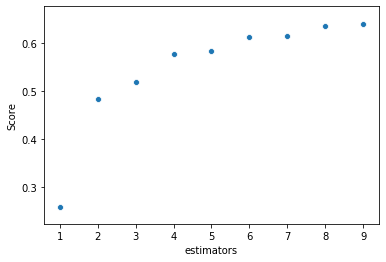

In [ ]:
#RUN THIS TO GET NUMBER OF ESTIMATORS


sns.scatterplot(x=cv_scores.index, y=cv_scores.values)
plt.xlabel('estimators')
plt.ylabel('Score')

maxnum=cv_scores.idxmax()
maxnum

In [ ]:
#FINALLY RUN RF   

regressor = RandomForestRegressor(n_estimators=maxnum, random_state=0, max_features = .9)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


# Predict the number of wins
#print(linreg_reduced.predict(X_test))

#test Scores:
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)



print('\nThe train score is {} and the test score is {}'.format(train_score, test_score))




from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


The train score is 0.8992250603307784 and the test score is -5.84709744870685
Mean Absolute Error: 1.9143518518518519
Mean Squared Error: 4.362461419753086
Root Mean Squared Error: 2.088650621753932
